# MobiAct Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Dataset
!unrar x /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0.rar > /dev/null

/content/drive/MyDrive/Dataset


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from scipy import signal
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [ ]:
person_numlist = list(range(1, 68))
trials = list(range(1, 4))

In [ ]:
# Loading ADLs (loading 5 times more adl data then fall, according to proportions)
# Taking 7 adls and 4 falls
# adl_types tells number of windows to extract from each data file

fall_types = ['FOL', 'FKL', 'BSC', 'SDL']
adl_types = {
    'STD':1,
    'WAL':1,
    'JOG':3,
    'JUM':3,
    'STU':6,
    'STN':6,
    'SIT':1
}

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/JOG===================================================================================================
Time taken :-  2.975381374359131


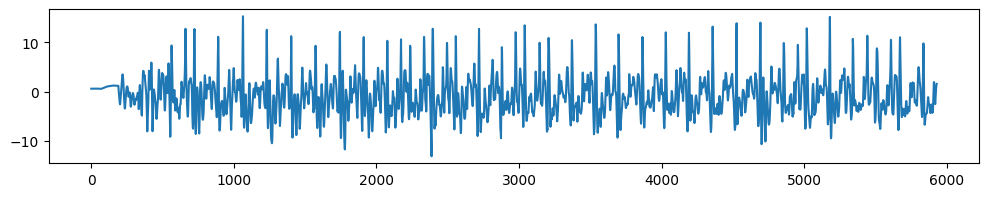

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/JUM===================================================================================================
Time taken :-  6.959756135940552


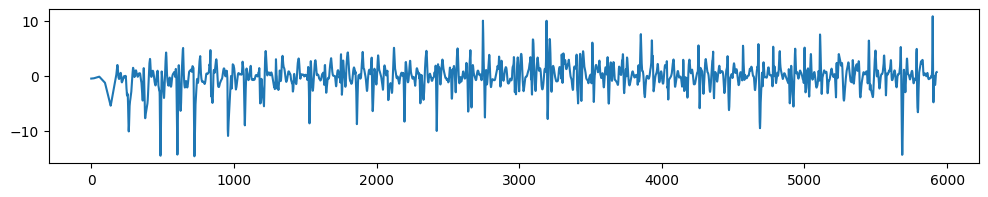

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/SIT===================================================================================================
Time taken :-  0.6157238483428955


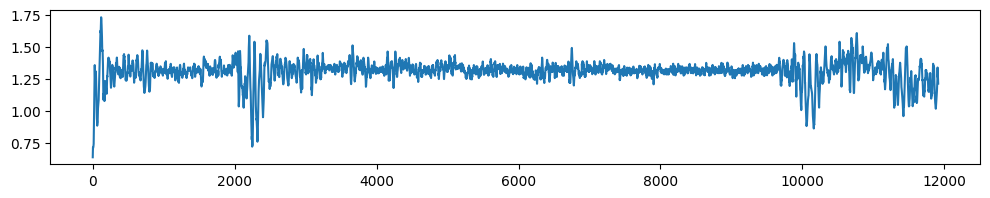

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/STD===================================================================================================
Time taken :-  8.541712284088135


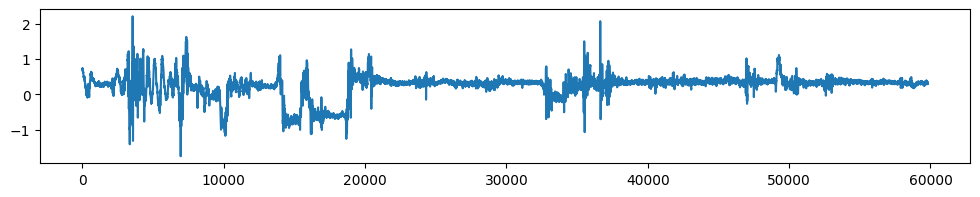

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/STN===================================================================================================
Time taken :-  2.0421864986419678


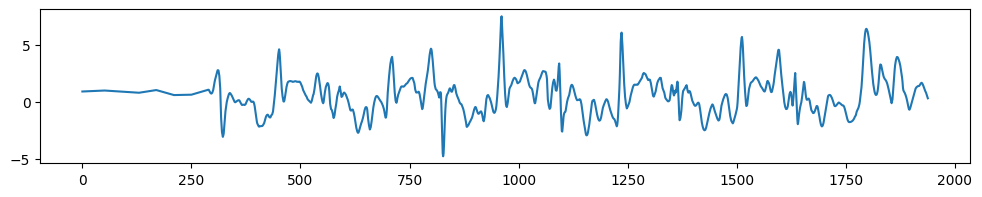

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/STU===================================================================================================
Time taken :-  1.771571159362793


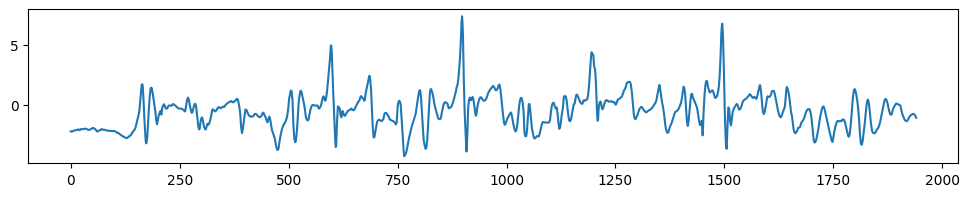

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/WAL===================================================================================================
Time taken :-  8.077088832855225


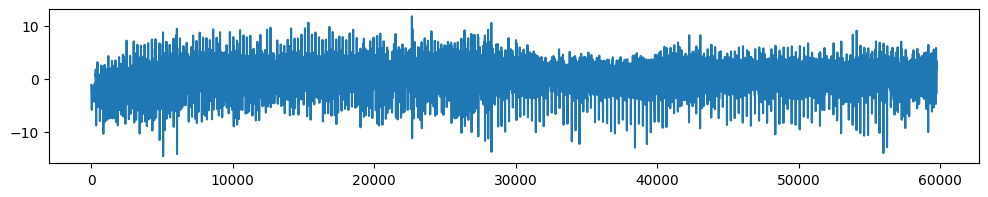

Time taken ==  30.9834201335907


In [ ]:
xtrain = []
ytrain = []

total_time = 0

for folder in os.listdir('/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data'):
    if folder not in adl_types : continue
    t1 = time.time()
    
    visualize = 1
    
    path = '/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/' + folder
    print('reading from ',path,end = '')
    for person in person_numlist:
        for trial in trials:
            try :
                data = pd.read_csv(path + '/' + folder + '_' + str(person) + '_' + str(trial) + '_' + 'annotated.csv')

                acc_x = np.array(data['acc_x']).reshape((len(data),1))
                acc_y = np.array(data['acc_y']).reshape((len(data),1))
                acc_z = np.array(data['acc_z']).reshape((len(data),1))
                gyro_x = np.array(data['gyro_x']).reshape((len(data),1))
                gyro_y = np.array(data['gyro_y']).reshape((len(data),1))
                gyro_z = np.array(data['gyro_z']).reshape((len(data),1))

                data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z],axis = -1)

                num_windows = (15+adl_types[folder])/adl_types[folder]
                for last_point in range(600,len(acc_x)+1,300):
                    num_windows -= 1
                    xtrain.append(data[last_point-600:last_point])
                    ytrain.append(0)
                    if num_windows == 0 : break
                        
                if visualize == 1:
                    plt.figure(figsize = (12,2))
                    plt.plot(acc_x)
                    visualize = 0
                    print('===================================================================================================')
            except : continue

    # activity += 1
    t2 = time.time()
    total_time += t2 - t1
    print('Time taken :- ' , t2 - t1)
    plt.show()
print('Time taken == ',total_time)

FOL data :- 


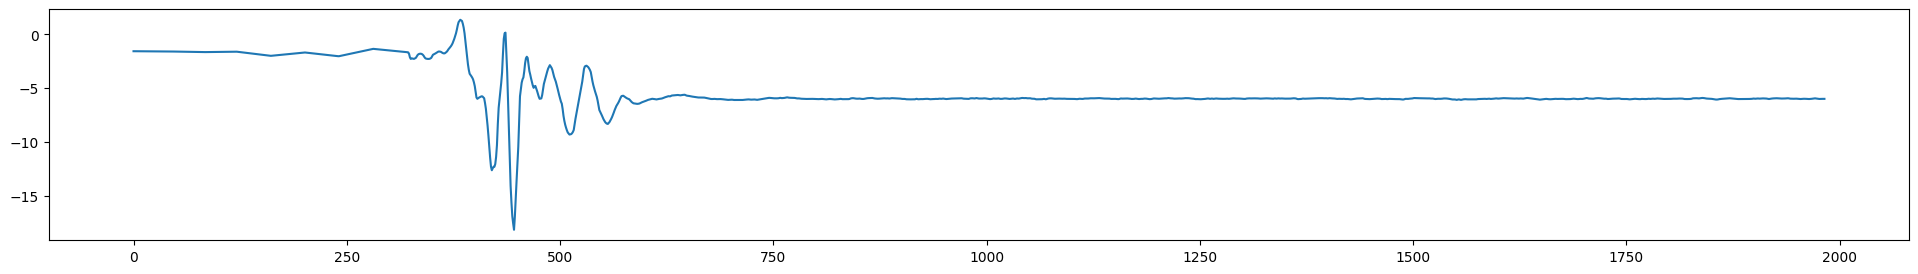

FKL data :- 


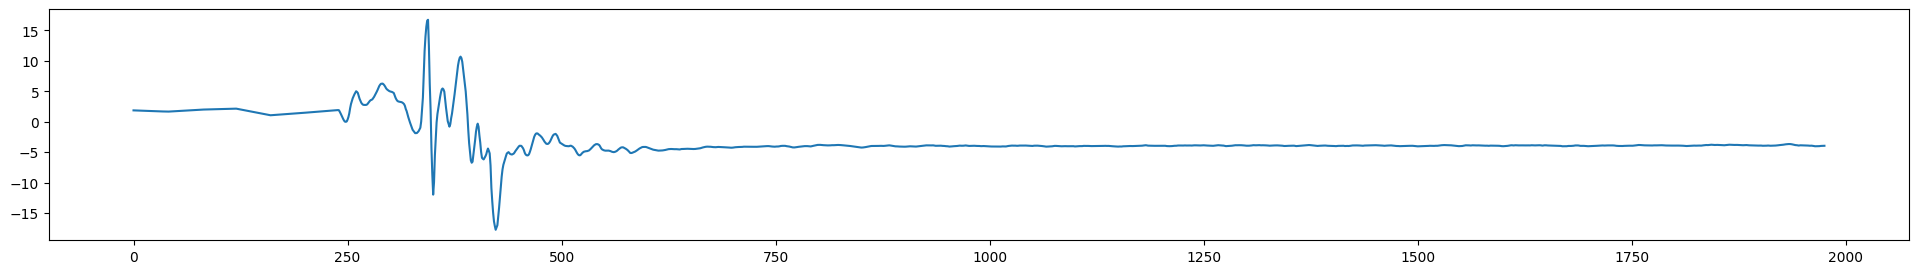

BSC data :- 


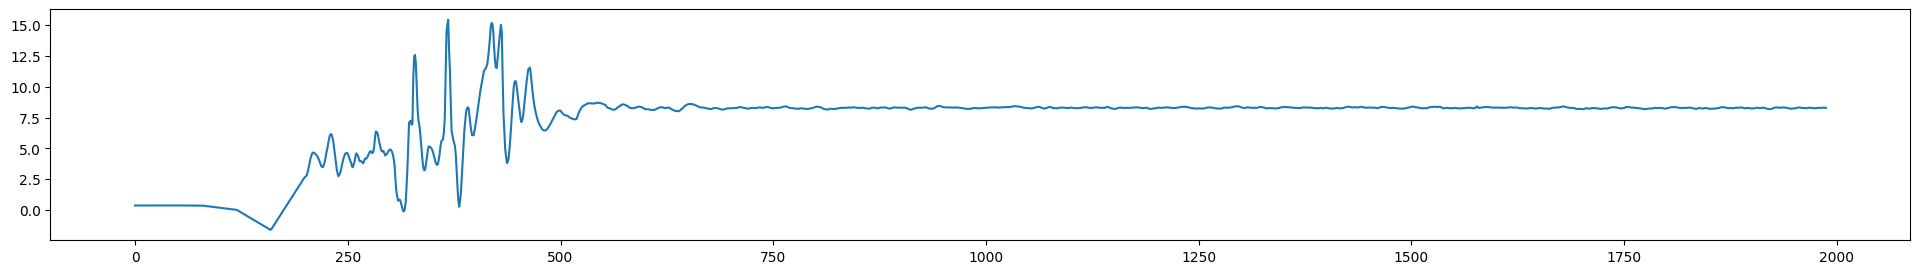

SDL data :- 


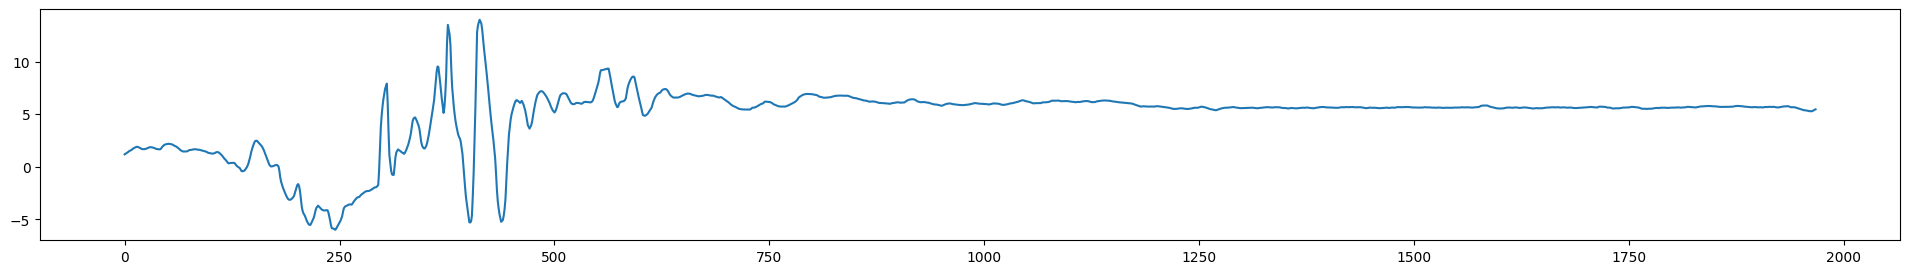

In [ ]:
# Visualizing acc_x of falls

print('FOL data :- ')
data = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/FOL/FOL_14_3_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

print('FKL data :- ')
data = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/FKL/FKL_12_3_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

print('BSC data :- ')
data = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/BSC/BSC_12_3_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

print('SDL data :- ')
data = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/SDL/SDL_11_1_annotated.csv')['acc_x'])
plt.figure(figsize = (24,3))
plt.plot(data)
plt.show()

reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/BSC

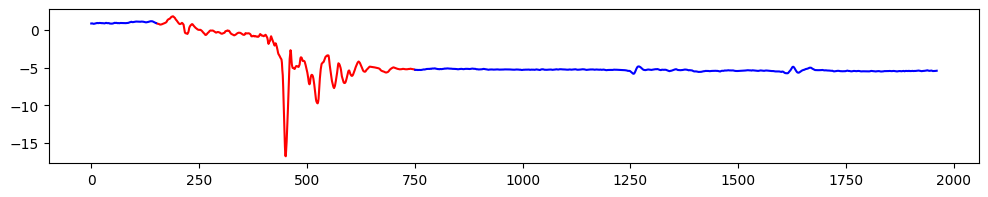

Time taken :-  2.613429069519043
reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/FKL

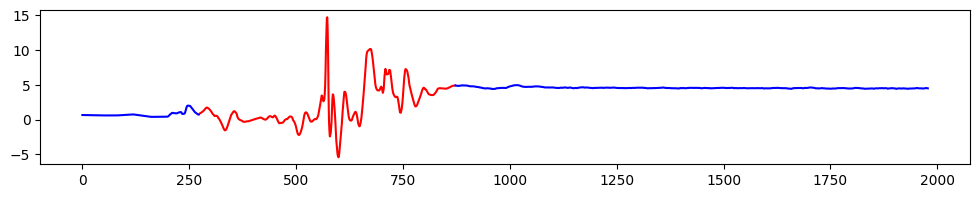

Time taken :-  1.8407790660858154
reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/FOL

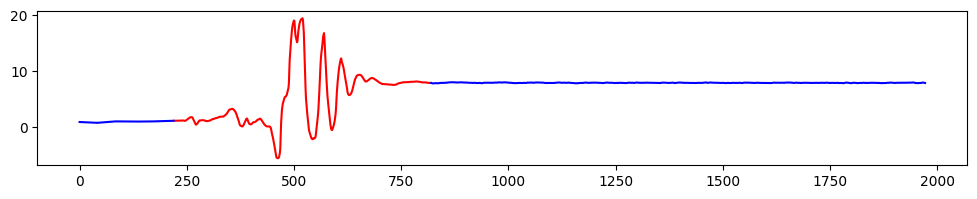

Time taken :-  1.1046545505523682
reading from  /content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/SDL

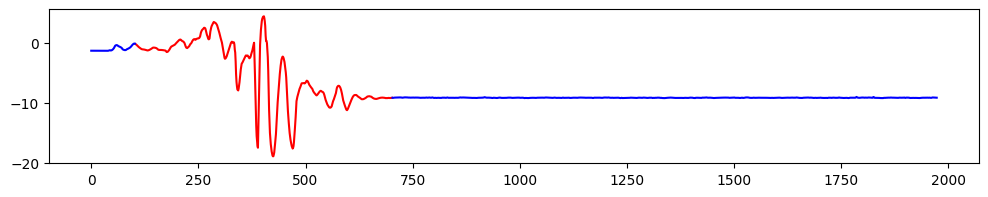

Time taken :-  1.6598460674285889
Time taken ==  7.218708753585815


In [ ]:
# We extract using standard deviation

# Last visualization represents data before and after fall event extraction

total_time = 0

for folder in os.listdir('/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data'):
    if folder not in fall_types : continue
    t1 = time.time()
    
    visualize = 1
    
    path = '/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0/Annotated Data/' + folder
    print('reading from ',path,end = '')
    for person in person_numlist:
        for trial in trials:
            try :
                data = pd.read_csv(path + '/' + folder + '_' + str(person) + '_' + str(trial) + '_' + 'annotated.csv')

                acc_x = np.array(data['acc_x']).reshape((len(data),1))
                acc_y = np.array(data['acc_y']).reshape((len(data),1))
                acc_z = np.array(data['acc_z']).reshape((len(data),1))
                gyro_x = np.array(data['gyro_x']).reshape((len(data),1))
                gyro_y = np.array(data['gyro_y']).reshape((len(data),1))
                gyro_z = np.array(data['gyro_z']).reshape((len(data),1))

                data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z],axis = -1)

                acc_x_sd = ((acc_x - np.sum(acc_x)/len(acc_x))**2)
                at = min(len(acc_x)-300,max(300,np.argmax(acc_x_sd)))
                if(len(acc_x) < 600) : continue
                
                # Trying to increase data points in fall dataset upto before 
                # if visualize == 1: ...
                
                at -= 100
                if at-300 >= 0 and at+300 <= len(acc_x):
                    xtrain.append(data[at-300:at+300])
                    ytrain.append(1)
                    
                at += 200
                if at-300 >= 0 and at+300 <= len(acc_x):
                    xtrain.append(data[at-300:at+300])
                    ytrain.append(1)
                
                at -= 100
                if at-300 >= 0 and at+300 <= len(acc_x):
                    xtrain.append(data[at-300:at+300])
                    ytrain.append(1)
                
                if visualize == 1:
                    plt.figure(figsize = (12,2))
                    plt.plot(np.arange(at-300,at+300),acc_x[at-300:at+300],color = 'red')
                    plt.plot(np.arange(0,at-300),acc_x[0:at-300],color = 'blue')
                    plt.plot(np.arange(at+300,len(acc_x)),acc_x[at+300:],color = 'blue')
                    plt.show()
                    visualize = 0
                    print('===================================================================================================')
            except : continue

    t2 = time.time()
    total_time += t2 - t1
    print('Time taken :- ' , t2 - t1)
    plt.show()
print('Time taken == ',total_time)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [ ]:
xtrain.shape,ytrain.shape

((7885, 600, 6), (7885,))

In [ ]:
ytrain1 = []
for i in ytrain:
    ytrain1.append([0]*2)
    ytrain1[-1][i] = 1
ytrain = np.array(ytrain1)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,train_size = 0.7)
xtest,xval,ytest,yval = train_test_split(xtest,ytest,train_size = 0.5)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((5519, 600, 6),
 (5519, 2),
 (1183, 600, 6),
 (1183, 2),
 (1183, 600, 6),
 (1183, 2))

In [ ]:
for i in range(6):
    min_ = min([min(j) for j in xtrain[:,:,i]])
    max_ = max([max(j) for j in xtrain[:,:,i]])
    
    xtrain[:,:,i] = 2*(xtrain[:,:,i]-min_)/(max_-min_)-1
    
for i in range(6):
    min_ = min([min(j) for j in xtest[:,:,i]])
    max_ = max([max(j) for j in xtest[:,:,i]])
    
    xtest[:,:,i] = 2*(xtest[:,:,i]-min_)/(max_-min_)-1
    
for i in range(6):
    min_ = min([min(j) for j in xval[:,:,i]])
    max_ = max([max(j) for j in xval[:,:,i]])
    
    xval[:,:,i] = 2*(xval[:,:,i]-min_)/(max_-min_)-1

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((5519, 600, 6),
 (5519, 2),
 (1183, 600, 6),
 (1183, 2),
 (1183, 600, 6),
 (1183, 2))

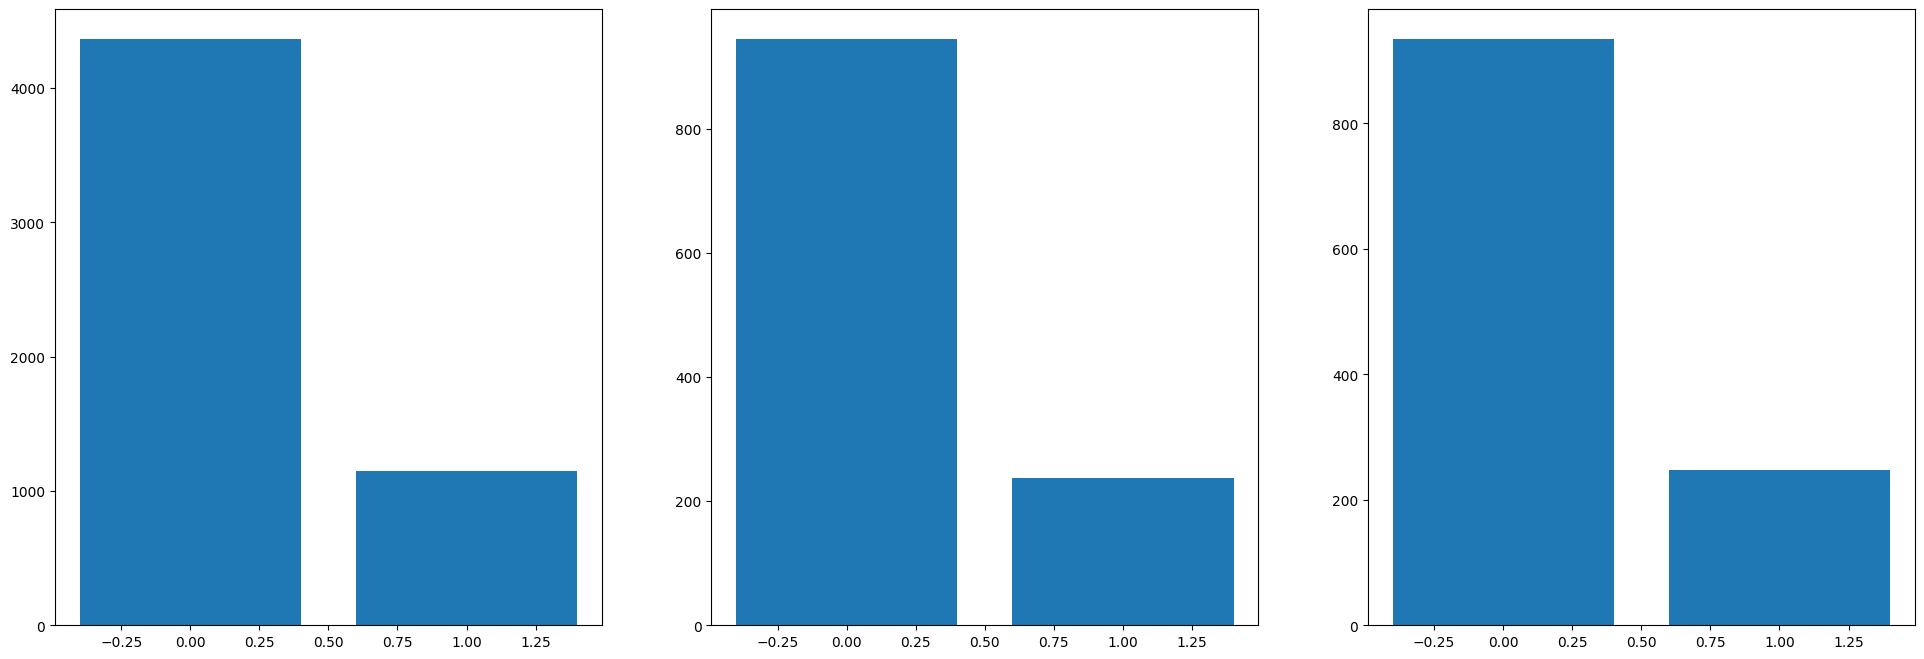

In [ ]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.bar(np.arange(0,2),sum(ytrain))

plt.subplot(1,3,2)
plt.bar(np.arange(0,2),sum(ytest))

plt.subplot(1,3,3)
plt.bar(np.arange(0,2),sum(yval))
plt.show()

# MLP Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [ ]:
def label(data, is_fall):
       # Falls (1)
  if is_fall == 1:
      for i in range(len(data)):
          data[i]["Label"]=1  
       #ADLs (0)        
  else: 
      for i in range(len(data)):
          data[i]["Label"]=0

  return data

In [ ]:
def create_data_vector(list): 
    data_vector=[]
    for item in list: 
        for i in range(len(item)): 
            data_vector.append(item[i])
    
    #Shuffle array
    random.shuffle(data_vector)
    return data_vector

In [ ]:
def create_data_matrix(data_vector):
   data_matrix=([],[])
   for i in range(len(data_vector)):
       data_matrix[0].append(data_vector[i][["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"]])
       data_matrix[1].append(data_vector[i].at[0,"Label"])
       
   return data_matrix

In [ ]:
def list_dataframe_to_list_numpy_array(data_matrix):
   X = []
   y = []

   for i in range(len(data_matrix[0])):
       X.append(data_matrix[0][i].values)
   for i in range(len(data_matrix[1])):
       y.append(data_matrix[1][i])
   return np.array(X), np.array(y)

In [ ]:
    #Path to MobiAct_Dataset_v2
    pfad="/content/drive/MyDrive/Dataset/MobiAct_Dataset_v2.0"
    #FALLS
   
    #FOL    
    FOL=[pd.read_csv(pfad+"/Annotated Data/FOL/FOL_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/FOL/FOL_{0}_{1}_annotated.csv".format(i,a))
            ]
    
    FKL=[pd.read_csv(pfad+"/Annotated Data/FKL/FKL_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/FKL/FKL_{0}_{1}_annotated.csv".format(i,a))
            ]

    BSC=[pd.read_csv(pfad+"/Annotated Data/BSC/BSC_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/BSC/BSC_{0}_{1}_annotated.csv".format(i,a))
            ]
    
    SDL=[pd.read_csv(pfad+"/Annotated Data/SDL/SDL_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/SDL/SDL_{0}_{1}_annotated.csv".format(i,a))
            ]

    CHU=[pd.read_csv(pfad+"/Annotated Data/CHU/CHU_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/CHU/CHU_{0}_{1}_annotated.csv".format(i,a))
            ]
  
    SCH=[pd.read_csv(pfad+"/Annotated Data/SCH/SCH_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/SCH/SCH_{0}_{1}_annotated.csv".format(i,a))
            ]

    STU=[pd.read_csv(pfad+"/Annotated Data/STU/STU_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/STU/STU_{0}_{1}_annotated.csv".format(i,a))
            ]

    STN=[pd.read_csv(pfad+"/Annotated Data/STN/STN_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/STN/STN_{0}_{1}_annotated.csv".format(i,a))
            ]

    CSI=[pd.read_csv(pfad+"/Annotated Data/CSI/CSI_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/CSI/CSI_{0}_{1}_annotated.csv".format(i,a))
            ]

    CSO=[pd.read_csv(pfad+"/Annotated Data/CSO/CSO_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/CSO/CSO_{0}_{1}_annotated.csv".format(i,a))
            ]

    JOG=[pd.read_csv(pfad+"/Annotated Data/JOG/JOG_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/JOG/JOG_{0}_{1}_annotated.csv".format(i,a))
            ]

    JUM=[pd.read_csv(pfad+"/Annotated Data/JUM/JUM_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/JUM/JUM_{0}_{1}_annotated.csv".format(i,a))
            ]

    SIT=[pd.read_csv(pfad+"/Annotated Data/SIT/SIT_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/SIT/SIT_{0}_{1}_annotated.csv".format(i,a))
            ]

    STD=[pd.read_csv(pfad+"/Annotated Data/STD/STD_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/STD/STD_{0}_{1}_annotated.csv".format(i,a))
            ]

    WAL=[pd.read_csv(pfad+"/Annotated Data/WAL/WAL_{0}_{1}_annotated.csv".format(i,a),usecols=["rel_time","acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"])
    for a in range(1,4)
        for i in range(1,68)
            if os.path.exists(pfad+"/Annotated Data/WAL/WAL_{0}_{1}_annotated.csv".format(i,a))
            ]

In [ ]:
FOL=label(FOL,1)   
FKL=label(FKL,1)
BSC=label(BSC,1)
SDL=label(SDL,1)
CHU=label(CHU,0)
SCH=label(SCH,0)
STU=label(STU,0)
STN=label(STN,0)
CSI=label(CSI,0)
CSO=label(CSO,0)
JOG=label(JOG,0)
JUM=label(JUM,0)
SIT=label(SIT,0)
STD=label(STD,0)
WAL=label(WAL,0)

In [ ]:
data_vector = create_data_vector([FOL,FKL,BSC,SDL,CHU,SCH,STU,STN,CSI,CSO,JOG,JUM,SIT,STD,WAL])

In [ ]:
   i = 0
   data_matrix=([],[])
   for i in range(len(data_vector)):
       data_matrix[0].append(data_vector[i][["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth","pitch","roll"]])
       data_matrix[1].append(data_vector[i].at[0,"Label"])

In [ ]:
X, y = list_dataframe_to_list_numpy_array(data_matrix)
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)

<ipython-input-5-49dc3dfbc78a>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = keras.Sequential([     
   keras.layers.Flatten(), 
   keras.layers.Masking(mask_value=0.0),
   keras.layers.Dense(109, activation=tf.nn.softsign), 
   keras.layers.Dense(50, activation=tf.nn.softmax),
])

In [ ]:
optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, validation_split=0.15, batch_size=100, epochs=5500 ) 

In [ ]:
   model.summary()  
   # Test Model
   test_loss, test_acc = model.evaluate(X_test, y_test) 
   print('Test accuracy:', test_acc) 
   print('Test loss:', test_loss)
   visualization(history)
   #Save it
   model.save('simple_mlp5500.pb')

# LSTM Model

In [ ]:
def build_lstm(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    lstm = layers.LSTM(36,return_sequences = True,name = 'lstm_0')(input_layer)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.LSTM(64,return_sequences = True,name = 'lstm_1')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.LSTM(128,return_sequences = True,name = 'lstm_2')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.LSTM(64,name = 'lstm_5')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dense(32,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'sigmoid')(lstm)
    
    return keras.Model(input_layer,lstm)

In [ ]:
lstm = build_lstm(xtrain.shape[1:],2)

In [ ]:
lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_ (InputLayer)         [(None, 600, 6)]          0         
                                                                 
 lstm_0 (LSTM)               (None, 600, 36)           6192      
                                                                 
 layer_normalization (LayerN  (None, 600, 36)          72        
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 600, 64)           25856     
                                                                 
 layer_normalization_1 (Laye  (None, 600, 64)          128       
 rNormalization)                                                 
                                                                 
 lstm_2 (LSTM)               (None, 600, 128)          98816 

In [ ]:
lstm.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
lstm_history = lstm.fit(
    xtrain,
    ytrain,
    validation_data = (
        xtest,
        ytest
    ),
    epochs = 5,
    batch_size = 200,
)

Epoch 1/5
28/28 [==============================] - 26s 221ms/step - loss: 0.2168 - accuracy: 0.9116 - val_loss: 0.1137 - val_accuracy: 0.9594
Epoch 2/5
28/28 [==============================] - 5s 169ms/step - loss: 0.0872 - accuracy: 0.9638 - val_loss: 0.0882 - val_accuracy: 0.9586
Epoch 3/5
28/28 [==============================] - 5s 168ms/step - loss: 0.0787 - accuracy: 0.9667 - val_loss: 0.1026 - val_accuracy: 0.9535
Epoch 4/5
28/28 [==============================] - 4s 156ms/step - loss: 0.0795 - accuracy: 0.9663 - val_loss: 0.0926 - val_accuracy: 0.9653
Epoch 5/5
28/28 [==============================] - 5s 170ms/step - loss: 0.0793 - accuracy: 0.9676 - val_loss: 0.1030 - val_accuracy: 0.9569


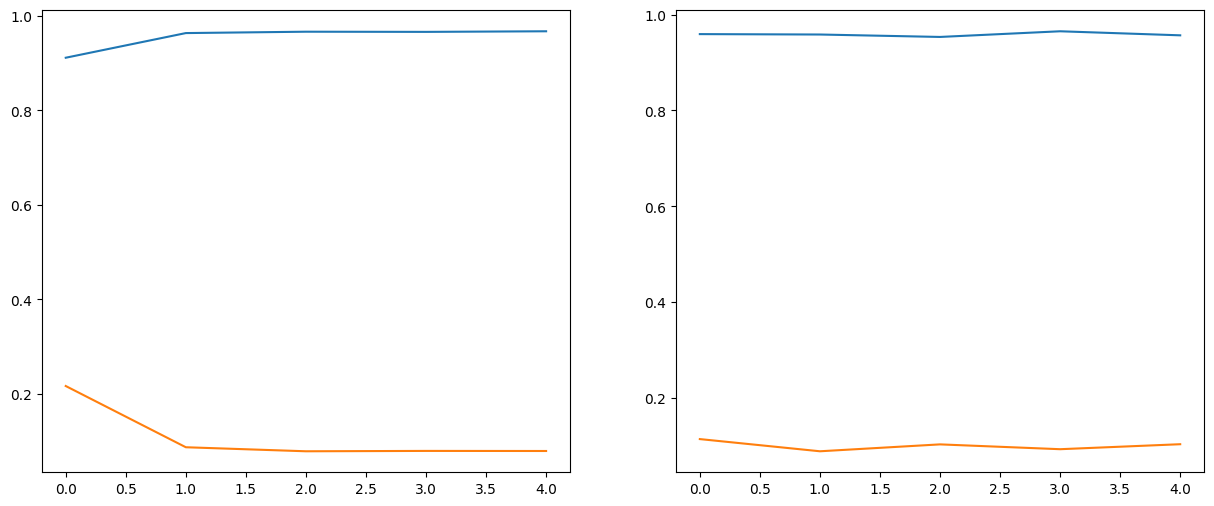

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['loss'])
plt.subplot(1,2,2)
plt.plot(lstm_history.history['val_accuracy'])
plt.plot(lstm_history.history['val_loss'])
plt.show()

In [ ]:
ypred = lstm.predict(xtest)
ytemp = []
for i in ypred:
    pred = [0]*2
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

37/37 [==============================] - 3s 35ms/step


In [ ]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  95.68892645815723


In [ ]:
test_cm = confusion_matrix(ytest.argmax(axis = 1),ypred.argmax(axis = 1))

<Axes: >

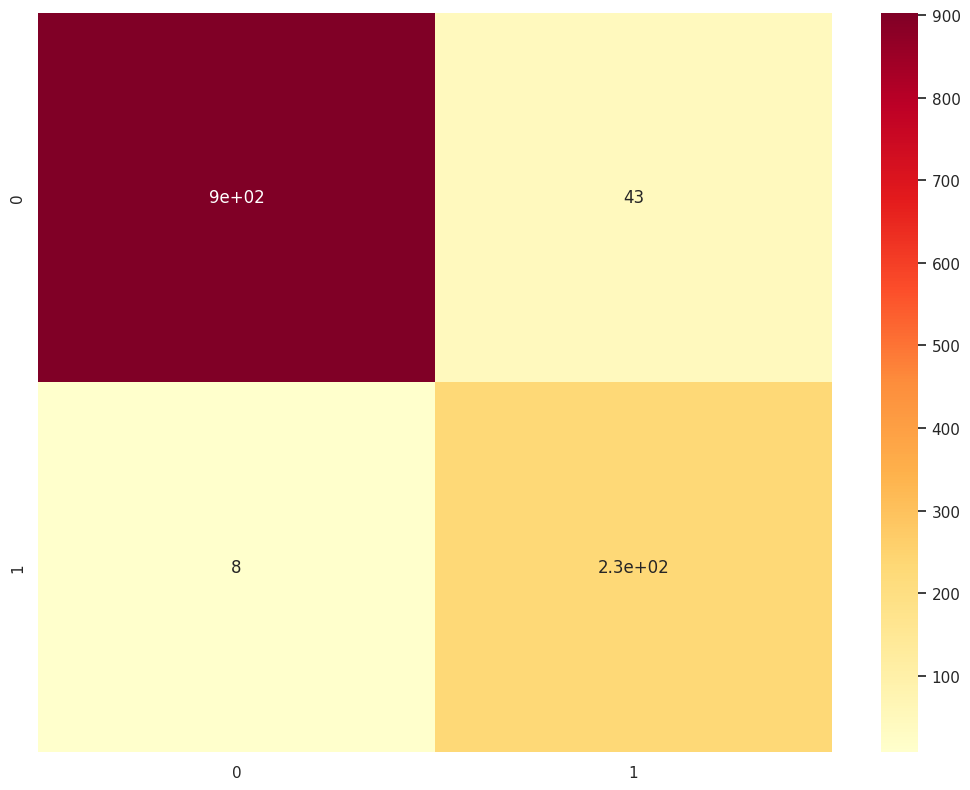

In [ ]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [ ]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       946
           1       0.84      0.97      0.90       237

    accuracy                           0.96      1183
   macro avg       0.92      0.96      0.94      1183
weighted avg       0.96      0.96      0.96      1183



# CNN-LSTM Model

In [ ]:
def build_conv_lstm(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    cnn = layers.Conv1D(24,2,1,"same",name = 'Conv1D_'+'_1')(input_layer)
    cnn = layers.LayerNormalization(name = 'layernorm_'+'_1')(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_2'+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_2'+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_3'+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_3'+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_6'+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_6'+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
        
    lstm = layers.LSTM(64,return_sequences = True,name = 'lstm_0')(cnn)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    lstm = layers.LSTM(64,name = 'lstm_1')(lstm)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    
    lstm = layers.Dense(64,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [ ]:
conv_lstm = build_conv_lstm(xtrain.shape[1:],ytrain.shape[1])

In [ ]:
conv_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_ (InputLayer)         [(None, 600, 6)]          0         
                                                                 
 Conv1D__1 (Conv1D)          (None, 600, 24)           312       
                                                                 
 layernorm__1 (LayerNormaliz  (None, 600, 24)          48        
 ation)                                                          
                                                                 
 Conv1D_2_1 (Conv1D)         (None, 600, 144)          7056      
                                                                 
 layernorm_2_1 (LayerNormali  (None, 600, 144)         288       
 zation)                                                         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 300, 144)         0   

In [ ]:
conv_lstm.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
conv_lstm_history = conv_lstm.fit(
    xtrain,
    ytrain,
    validation_data = (
        xval,
        yval
    ),
    epochs = 5,
    batch_size = 200,
)

Epoch 1/5
28/28 [==============================] - 19s 177ms/step - loss: 0.2190 - accuracy: 0.9014 - val_loss: 0.0888 - val_accuracy: 0.9679
Epoch 2/5
28/28 [==============================] - 3s 94ms/step - loss: 0.1098 - accuracy: 0.9518 - val_loss: 0.0810 - val_accuracy: 0.9704
Epoch 3/5
28/28 [==============================] - 3s 94ms/step - loss: 0.1127 - accuracy: 0.9514 - val_loss: 0.0935 - val_accuracy: 0.9637
Epoch 4/5
28/28 [==============================] - 3s 94ms/step - loss: 0.0936 - accuracy: 0.9598 - val_loss: 0.0468 - val_accuracy: 0.9831
Epoch 5/5
28/28 [==============================] - 3s 96ms/step - loss: 0.0548 - accuracy: 0.9788 - val_loss: 0.0606 - val_accuracy: 0.9789


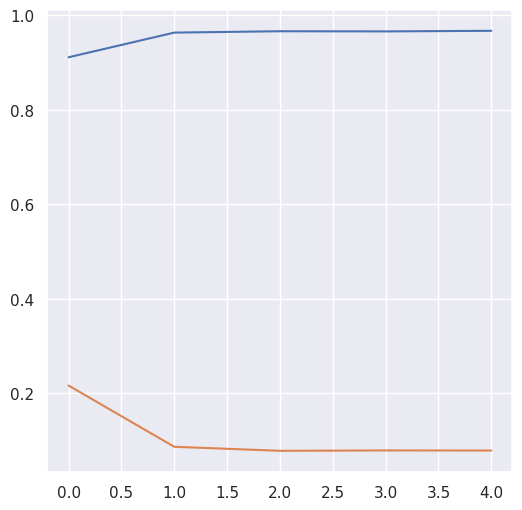

In [ ]:
plt.figure(figsize = (6,6))
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['loss'])
plt.show()

In [ ]:
ypred = conv_lstm.predict(xtest)
ytemp = []
for i in ypred:
    pred = [0]*(ytrain.shape[1])
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

37/37 [==============================] - 2s 14ms/step


In [ ]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  97.46407438715131


<Axes: >

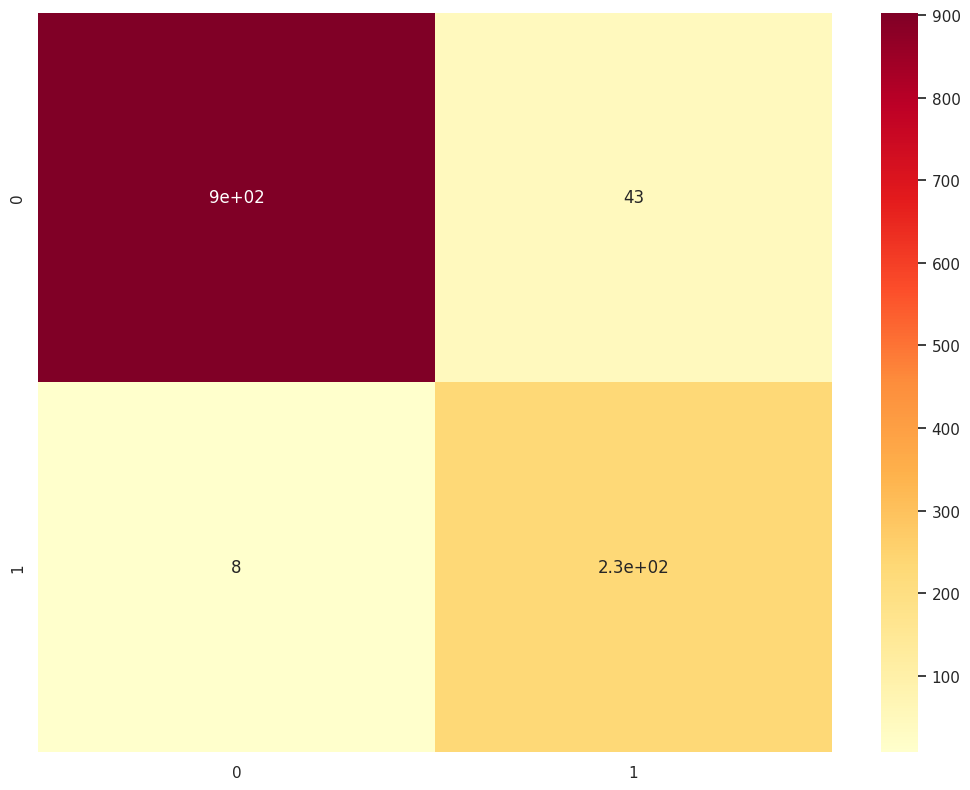

In [ ]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [ ]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       946
           1       0.92      0.95      0.94       237

    accuracy                           0.97      1183
   macro avg       0.96      0.97      0.96      1183
weighted avg       0.98      0.97      0.97      1183

